In [1]:
import csv
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random

In [2]:
df = pd.read_csv("combined_ocr_dataset.csv")

FileNotFoundError: [Errno 2] No such file or directory: 'combined_ocr_dataset.csv'

In [123]:
df.head()

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784,class
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,9


### Excluding Label and storing and converting it to Numpy Array

In [124]:
df_array_label = df.to_numpy()

In [125]:
label = df_array_label[:, -1]

In [126]:
label

array([ 5.,  0.,  4., ..., 26., 29., 33.])

In [127]:
type(label)

numpy.ndarray

### Dropping Label and using the remaining Numpy Array

In [128]:
df = df.drop(["class"], axis = 1)

In [129]:
df_array = df.to_numpy()

In [130]:
df_array.shape

(884900, 784)

In [131]:
type(df_array)

numpy.ndarray

In [132]:
df_array = df_array.reshape(-1, 28, 28)

In [133]:
df_array.ndim

3

In [134]:
df_array

array([[[  0.,   0.,   0., ...,   0.,   0.,   0.],
        [  0.,   0.,   0., ...,   0.,   0.,   0.],
        [  0.,   0.,   0., ...,   0.,   0.,   0.],
        ...,
        [  0.,   0.,   0., ...,   0.,   0.,   0.],
        [  0.,   0.,   0., ...,   0.,   0.,   0.],
        [  0.,   0.,   0., ...,   0.,   0.,   0.]],

       [[  0.,   0.,   0., ...,   0.,   0.,   0.],
        [  0.,   0.,   0., ...,   0.,   0.,   0.],
        [  0.,   0.,   0., ...,   0.,   0.,   0.],
        ...,
        [  0.,   0.,   0., ...,   0.,   0.,   0.],
        [  0.,   0.,   0., ...,   0.,   0.,   0.],
        [  0.,   0.,   0., ...,   0.,   0.,   0.]],

       [[  0.,   0.,   0., ...,   0.,   0.,   0.],
        [  0.,   0.,   0., ...,   0.,   0.,   0.],
        [  0.,   0.,   0., ...,   0.,   0.,   0.],
        ...,
        [  0.,   0.,   0., ...,   0.,   0.,   0.],
        [  0.,   0.,   0., ...,   0.,   0.,   0.],
        [  0.,   0.,   0., ...,   0.,   0.,   0.]],

       ...,

       [[255., 255., 255

In [135]:
len(df_array)

884900

In [136]:
df_array[0]

array([[  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.],
       [  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.],
       [  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.],
       [  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.],
       [  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.],
       [  0.,   0.,   0.,   0.,   0

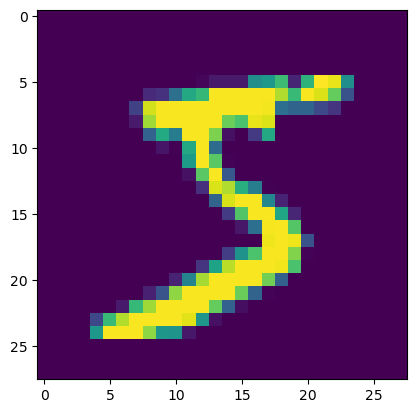

In [137]:
plt.imshow(df_array[0])

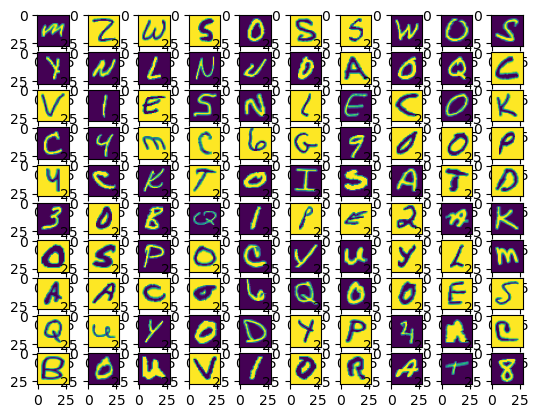

In [54]:
fig = plt.figure()

for i in range(100):
    plt.subplot(10, 10, i+1)
    plt.imshow(df_array[random.randint(0, len(df_array))])
    
plt.show()

### Train Test Split

In [138]:
from keras.models import Sequential

In [139]:
from keras.layers import Dense, Dropout, Conv2D, MaxPool2D, Activation

In [140]:
from keras.utils import to_categorical

In [44]:
pip list

Package                      Version
---------------------------- ------------
absl-py                      2.1.0
aiofiles                     22.1.0
aiosqlite                    0.18.0
anyio                        3.5.0
argon2-cffi                  21.3.0
argon2-cffi-bindings         21.2.0
asttokens                    2.0.5
astunparse                   1.6.3
async-lru                    2.0.4
attrs                        23.1.0
Babel                        2.11.0
beautifulsoup4               4.12.2
bleach                       4.1.0
Bottleneck                   1.3.7
Brotli                       1.0.9
cachetools                   5.3.3
certifi                      2024.2.2
cffi                         1.16.0
charset-normalizer           2.0.4
colorama                     0.4.6
comm                         0.1.2
contourpy                    1.2.0
cycler                       0.11.0
debugpy                      1.6.7
decorator                    5.1.1
defusedxml                   0.7.1

In [141]:
from sklearn.model_selection import train_test_split

In [46]:
!pip install scikit-learn

   ---------------------------------------- 0.0/10.6 MB ? eta -:--:--
    --------------------------------------- 0.2/10.6 MB 5.8 MB/s eta 0:00:02
   ---- ----------------------------------- 1.1/10.6 MB 13.9 MB/s eta 0:00:01
   ------------ --------------------------- 3.4/10.6 MB 26.9 MB/s eta 0:00:01
   ---------------------------------------  10.6/10.6 MB 81.8 MB/s eta 0:00:01
   ---------------------------------------- 10.6/10.6 MB 65.6 MB/s eta 0:00:00
   ---------------------------------------- 0.0/302.2 kB ? eta -:--:--
   --------------------------------------- 302.2/302.2 kB 19.5 MB/s eta 0:00:00


In [142]:
X = df_array
Y = label

In [144]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.9, random_state = 42)

In [145]:
X_train.shape

(88490, 28, 28)

In [146]:
X_test.shape

(796410, 28, 28)

In [147]:
Y_train.shape

(88490,)

In [148]:
Y_test.shape

(796410,)

In [149]:
X_train = X_train.astype("float32")
X_test = X_test.astype("float32")

### Normalization

In [150]:
X_train /= 255
X_test /= 255

### One Hot Encoding

In [151]:
cls = 36
print("Shape before encoding: ", Y_train.shape)
Y_train = to_categorical(Y_train, cls)
Y_test = to_categorical(Y_test, cls)
print("Shape before encoding: ", Y_train.shape)

Shape before encoding:  (88490,)
Shape before encoding:  (88490, 36)


In [153]:
Y_train.shape

(88490, 36)

### CNN Model

In [1]:
import tensorflow as tf
import keras

model = tf.keras.Sequential([
  keras.layers.Conv2D(128, (3, 3), activation='relu', input_shape=(28, 28, 1)),
  keras.layers.MaxPooling2D((2, 2)),
    
  keras.layers.Conv2D(128, (3, 3), activation='relu', input_shape=(28, 28, 1)),
  keras.layers.MaxPooling2D((2, 2)),
  
  keras.layers.Conv2D(128, (3, 3), activation='relu', input_shape=(28, 28, 1)),
  keras.layers.MaxPooling2D((2, 2)),

  keras.layers.Flatten(),
  keras.layers.Dense(128, activation = 'relu'),
  keras.layers.Dense(36, activation = 'softmax')
])

In [2]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 128)       1280      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 128)      0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 128)       147584    
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 128)        0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 3, 3, 128)         147584    
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 1, 1, 128)        0

In [71]:
model.compile(optimizer = "adam", loss = "categorical_crossentropy", metrics = ["accuracy"])

In [72]:
history = model.fit(X_train, Y_train, batch_size = 128, epochs = 5)

Epoch 1/5
5185/5185 [==============================] - 502s 97ms/step - loss: 0.3259 - accuracy: 0.9055
Epoch 2/5
5185/5185 [==============================] - 502s 97ms/step - loss: 0.1445 - accuracy: 0.9568
Epoch 3/5
5185/5185 [==============================] - 499s 96ms/step - loss: 0.1115 - accuracy: 0.9659
Epoch 4/5
5185/5185 [==============================] - 496s 96ms/step - loss: 0.0924 - accuracy: 0.9714
Epoch 5/5
5185/5185 [==============================] - 500s 96ms/step - loss: 0.0771 - accuracy: 0.9755


### Model Evaluation

In [73]:
score = model.evaluate(X_test, Y_test)
print("Test accuracy: ", score[1])

6914/6914 [==============================] - 57s 8ms/step - loss: 0.0905 - accuracy: 0.9720
Test accuracy:  0.9719832539558411


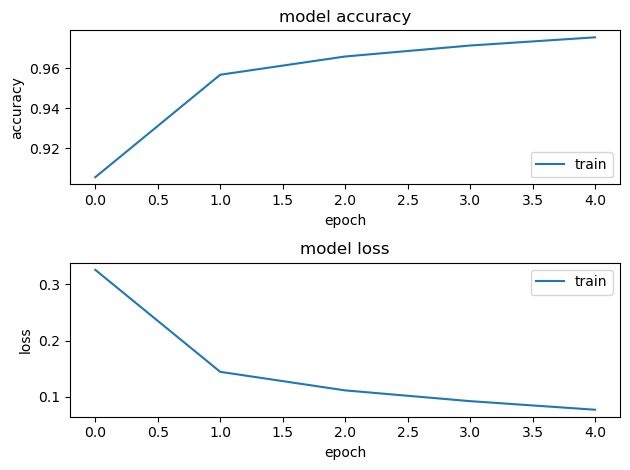

In [74]:
fig = plt.figure()
plt.subplot(2,1,1)
plt.plot(history.history['accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='lower right')

plt.subplot(2,1,2)
plt.plot(history.history['loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')

plt.tight_layout()

In [75]:
p = model.predict(X_test[12501:12502])
print(p)
print('Output is a 2-D array of length 10 = number of classes, we want the index of the highest probabilty')
print('The test sample predict as the digit ', np.argmax(p))
print('The actual test label is ', Y_test[12501])

1/1 [==============================] - 0s 100ms/step
[[2.43571121e-15 2.27374001e-14 2.91496480e-11 1.50116283e-18
  2.14199687e-12 2.43441118e-11 3.49764965e-12 9.77392840e-17
  2.58652633e-09 7.92669862e-20 1.38302767e-15 1.19902257e-14
  3.41046527e-13 3.97908052e-12 9.43057743e-10 3.36574865e-12
  7.49089610e-11 4.18313925e-11 1.58633652e-14 2.04599623e-14
  5.30374926e-08 7.57045541e-07 1.93740203e-14 1.55951216e-08
  1.44191014e-17 9.52093526e-12 5.24345456e-17 3.71449156e-11
  1.13235295e-14 9.44880719e-12 1.17839054e-11 1.41494737e-12
  1.58587146e-13 9.99999166e-01 7.87881049e-09 8.74093061e-13]]
Output is a 2-D array of length 10 = number of classes, we want the index of the highest probabilty
The test sample predict as the digit  33
The actual test label is  [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]


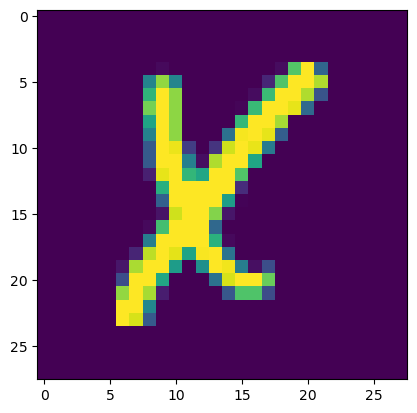

In [76]:
plt.imshow(X_test[12501])

In [158]:
model.save("OCR CNN.h5")

In [160]:
def test():
    import cv2
    from keras import models
    model = models.load_model("OCR CNN.h5")
    img = cv2.imread("Letter.png", 0) 
    # plt.imshow(img)
    img = cv2.resize(img, (28, 28), interpolation = cv2.INTER_AREA)
    img = img.reshape(-1, 28, 28, 1)
    print(label_dict[np.argmax(model.predict(img))])

In [164]:
test()

1/1 [==============================] - 0s 37ms/step
3


In [163]:
import cv2

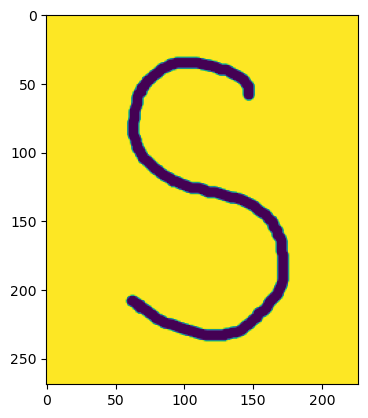

In [165]:
img = cv2.imread("Letter.png", 0) 
plt.imshow(img)
# model.predict(img)

In [115]:
img.shape

(243, 141)

In [116]:
img = cv2.resize(img, (28, 28), interpolation = cv2.INTER_AREA)

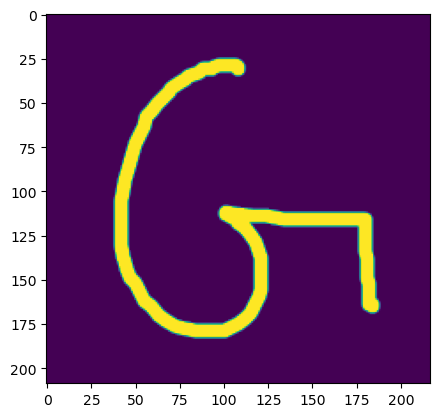

In [44]:
plt.imshow(img)

In [118]:
img = img.reshape(-1, 28, 28, 1)

In [119]:
img.shape

(1, 28, 28, 1)

In [120]:
# model = keras.models.load_model("OCR CNN.h5")
label_dict[np.argmax(model.predict(img))]

1/1 [==============================] - 0s 14ms/step


'8'

In [86]:
import keras

In [88]:
def func():
    i = random.randint(0, len(X_test))
    plt.imshow(X_test[i])
    p = model.predict(X_test[i:i + 1])
    #print(np.argmax)
    #print('Output is a 2-D array of length 10 = number of classes, we want the index of the highest probabilty')
    print('The test sample predict as the digit ', label_dict[np.argmax(p)])
    #print('The actual test label is ', Y_test[i])

1/1 [==============================] - 0s 16ms/step
The test sample predict as the digit  M


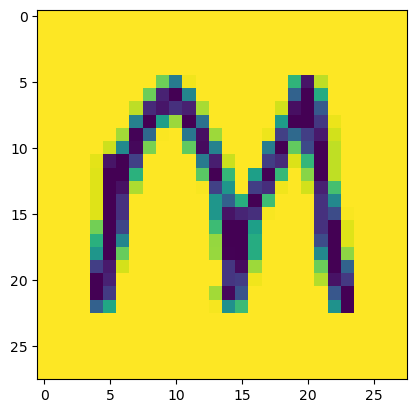

In [90]:
func()

### Combined DataFrame

In [2]:
df = pd.read_csv("digit_char_dataset.csv")

In [3]:
df.head()

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784,class
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,9


In [4]:
new_df = df

In [5]:
label = df["class"]

In [9]:
features = new_df.drop(["class"], axis = 1)

In [11]:
len(label.unique())

36

In [10]:
len(features)

442450

In [12]:
features

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
442445,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
442446,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
442447,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
442448,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [13]:
features = 255 - features

In [14]:
features

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,...,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0
1,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,...,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0
2,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,...,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0
3,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,...,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0
4,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,...,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
442445,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,...,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0
442446,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,...,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0
442447,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,...,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0
442448,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,...,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0


In [15]:
features.shape

(442450, 784)

In [16]:
df.shape

(442450, 785)

In [17]:
new_df

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784,class
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
442445,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,21
442446,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,13
442447,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,26
442448,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,29


In [23]:
features

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784,class
0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,...,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,5
1,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,...,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,0
2,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,...,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,4
3,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,...,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,1
4,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,...,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
442445,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,...,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,21
442446,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,...,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,13
442447,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,...,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,26
442448,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,...,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,29


In [22]:
features["class"] = label

In [21]:
label

0          5
1          0
2          4
3          1
4          9
          ..
442445    21
442446    13
442447    26
442448    29
442449    33
Name: class, Length: 442450, dtype: int64

In [24]:
combined_df = pd.concat([new_df, features])

In [33]:
combined_df

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784,class
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
442445,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,...,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,21
442446,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,...,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,13
442447,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,...,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,26
442448,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,...,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,29


In [34]:
combined_df.to_csv("combined_ocr_dataset.csv", index = False)

In [35]:
df = pd.read_csv("combined_ocr_dataset.csv")

In [36]:
df

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784,class
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
884895,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,...,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,21
884896,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,...,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,13
884897,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,...,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,26
884898,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,...,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,29


In [72]:
import csv
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random
import cv2
from keras import models

In [73]:
from sklearn.model_selection import train_test_split

In [74]:
df = pd.read_csv("combined_ocr_dataset.csv")

In [75]:
Y = df["class"]
X = df.drop(["class"], axis = 1)

In [76]:
X = X.to_numpy()
Y = Y.to_numpy()

In [110]:
X = X.reshape(-1, 28, 28)

In [77]:
model = models.load_model("OCR CNN.h5")

In [81]:
for layer in model.layers[:7]:
    layer.trainable = False

In [82]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 128)       1280      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 128)      0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 128)       147584    
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 128)        0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 3, 3, 128)         147584    
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 1, 1, 128)        0

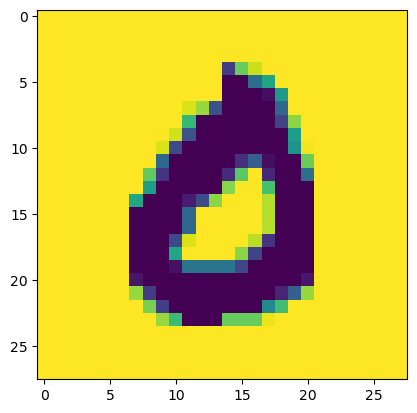

In [116]:
plt.imshow(X_test[0])

In [155]:
model.compile(optimizer = "adam", loss = "categorical_crossentropy", metrics = ["accuracy"])

In [121]:
Y_train.shape

(265470,)

In [157]:
history = model.fit(X_train, Y_train, batch_size = 128, epochs = 10)

Epoch 1/10
692/692 [==============================] - 1s 1ms/step - loss: 1.4218 - accuracy: 0.6321
Epoch 2/10
692/692 [==============================] - 1s 1ms/step - loss: 0.6746 - accuracy: 0.8166
Epoch 3/10
692/692 [==============================] - 1s 1ms/step - loss: 0.5153 - accuracy: 0.8595
Epoch 4/10
692/692 [==============================] - 1s 1ms/step - loss: 0.4291 - accuracy: 0.8830
Epoch 5/10
692/692 [==============================] - 1s 1ms/step - loss: 0.3758 - accuracy: 0.8963
Epoch 6/10
692/692 [==============================] - 1s 1ms/step - loss: 0.3419 - accuracy: 0.9058
Epoch 7/10
692/692 [==============================] - 1s 1ms/step - loss: 0.3120 - accuracy: 0.9135
Epoch 8/10
692/692 [==============================] - 1s 1ms/step - loss: 0.2908 - accuracy: 0.9196
Epoch 9/10
692/692 [==============================] - 1s 1ms/step - loss: 0.2730 - accuracy: 0.9236
Epoch 10/10
692/692 [==============================] - 1s 1ms/step - loss: 0.2556 - accuracy: 0.9282

In [105]:
import csv
import pandas as pd
import numpy as np
import keras
import tensorflow as tf
import matplotlib.pyplot as plt
import random
import cv2

In [2]:
df = pd.read_csv("combined_ocr_dataset.csv")

In [85]:
new_df = df.head(127)

In [86]:
new_df

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784,class
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
122,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2
123,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7
124,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
125,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,8


In [6]:
new_df.to_csv("dummy.csv")

In [12]:
label = new_df["class"]
features = new_df.drop(["class"], axis = 1)

In [13]:
label = label.to_numpy()
features = features.to_numpy()

In [17]:
img = cv2.imread("Letter.png", 0)

In [19]:
img = cv2.resize(img, (28, 28), interpolation = cv2.INTER_AREA)

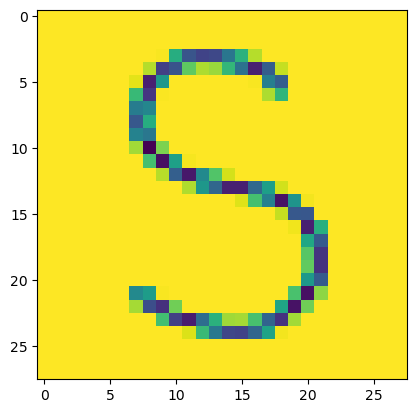

In [24]:
plt.imshow(img)

In [25]:
img = img.reshape(1, 784)

In [28]:
type(features)

numpy.ndarray

In [30]:
features[0]

array([  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   

In [38]:
img = pd.DataFrame(img)

In [39]:
type(img)

pandas.core.frame.DataFrame

In [41]:
img["class"] = 28

In [90]:
new_df.to_csv("testing.csv")

In [79]:
img.columns = new_df.columns

In [87]:
img

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784,class
0,255,255,255,255,255,255,255,255,255,255,...,255,255,255,255,255,255,255,255,255,28


In [88]:
new_df = pd.concat([new_df, img])

In [188]:
new_df = pd.read_csv("combined_ocr_dataset.csv")

In [189]:
new_df

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784,class
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
884895,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,...,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,21
884896,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,...,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,13
884897,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,...,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,26
884898,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,...,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,29


In [190]:
label = new_df["class"]
features = new_df.drop(["class"], axis = 1)

In [191]:
label = label.to_numpy()
features = features.to_numpy()

In [192]:
cls = 36
print("Shape before encoding: ", label.shape)
label = keras.utils.to_categorical(label, cls)
print("Shape before encoding: ", label.shape)

Shape before encoding:  (884900,)
Shape before encoding:  (884900, 36)


In [193]:
features = features.astype("float32")
features /= 255

In [194]:
features = features.reshape(-1, 28, 28)

In [195]:
features.shape

(884900, 28, 28)

In [196]:
model = keras.models.load_model("OCR CNN Dummy.h5")

In [197]:
for layer in model.layers[:7]:
    layer.trainable = False

In [198]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 128)       1280      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 128)      0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 128)       147584    
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 128)        0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 3, 3, 128)         147584    
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 1, 1, 128)        0

In [148]:
label_dict = {0 : "0", 1 : "1", 2 : "2", 3 : "3", 4 : "4", 5 : "5", 6 : "6", 7 : "7", 8 : "8", 9 : "9", 10 : "A", 11 : "B", 12 : "C", 13 : "D", 14 : "E", 15 : "F", 16 : "G", 17 : "H", 18 : "I", 19 : "J", 20 : "K", 21 : "L", 22 : "M", 23 : "N", 24 : "O", 25 : "P", 26 : "Q", 27 : "R", 28 : "S", 29 : "T", 30 : "U", 31 : "V", 32 : "W", 33 : "X", 34 : "Y", 35 : "Z"}

In [131]:
from sklearn.model_selection import train_test_split

In [132]:
og_df = pd.read_csv("combined_ocr_dataset.csv")

In [133]:
Y = og_df["class"]
X = og_df.drop(["class"], axis = 1)

In [134]:
Y

0          5
1          0
2          4
3          1
4          9
          ..
884895    21
884896    13
884897    26
884898    29
884899    33
Name: class, Length: 884900, dtype: int64

In [135]:
Y = Y.to_numpy()
X = X.to_numpy()

In [138]:
X.shape

(884900, 28, 28)

In [137]:
X = X.reshape(-1, 28, 28)

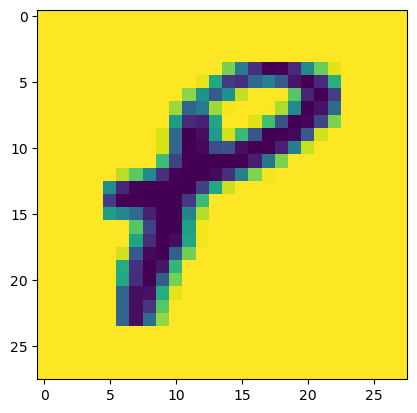

In [144]:
plt.imshow(X_train[0])

In [141]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.3, random_state = 42)

In [146]:
X_train[0].shape

(28, 28)

1/1 [==============================] - 0s 17ms/step
P


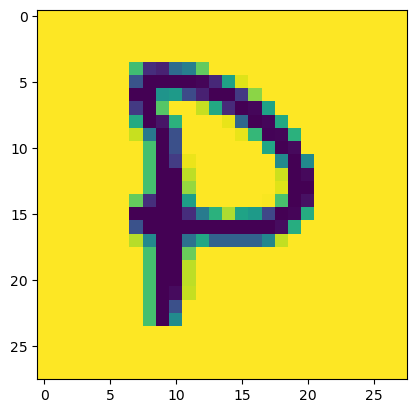

In [218]:
i = random.randint(0, len(features))
p = label_dict[np.argmax(model.predict(features[i].reshape(-1, 28, 28, 1)))]    # 4D
plt.imshow(features[i])
print(p)

In [208]:
model.save("OCR CNN Fine-Tuned.h5")

In [226]:
model = keras.models.load_model("OCR CNN Fine-Tuned.h5")

In [228]:
img = cv2.imread("S.png", 0)
img = cv2.resize(img, (28, 28), interpolation = cv2.INTER_AREA)
label_dict[np.argmax(model.predict(img.reshape(-1, 28, 28, 1)))]

1/1 [==============================] - 0s 20ms/step


'S'

### Final

In [250]:
df = pd.read_csv("combined_ocr_dataset.csv")

In [251]:
img = cv2.imread("Letter.png", 0)

In [252]:
img = cv2.resize(img, (28, 28), interpolation = cv2.INTER_AREA)

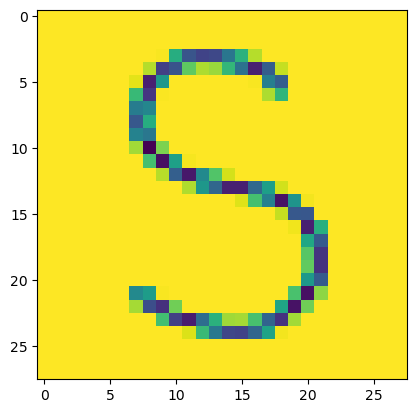

In [253]:
plt.imshow(img)

In [254]:
img.shape

(28, 28)

In [255]:
img = img.reshape(1, 784)

In [256]:
type(img)

numpy.ndarray

In [257]:
img = pd.DataFrame(img)

In [258]:
img

,0,1,2,3,4,5,6,7,8,9,...,774,775,776,777,778,779,780,781,782,783
0,255,255,255,255,255,255,255,255,255,255,...,255,255,255,255,255,255,255,255,255,255


In [259]:
img["class"] = 28

In [260]:
img.columns = df.columns

In [264]:
df

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784,class
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
884896,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,...,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,13
884897,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,...,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,26
884898,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,...,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,29
884899,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,...,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,33


In [262]:
img

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784,class
0,255,255,255,255,255,255,255,255,255,255,...,255,255,255,255,255,255,255,255,255,28


In [263]:
df = pd.concat([df, img])

In [265]:
label = df["class"]
features = df.drop(["class"], axis = 1)

In [267]:
label = label.to_numpy()
features = features.to_numpy()

In [271]:
features = features.reshape(-1, 28, 28)

In [274]:
label.shape

(884901,)

In [275]:
cls = 36
print("Shape before encoding: ", label.shape)
label = keras.utils.to_categorical(label, cls)
print("Shape before encoding: ", label.shape)

Shape before encoding:  (884901,)
Shape before encoding:  (884901, 36)


In [276]:
features = features.astype("float32")
features /= 255

In [277]:
model = keras.models.load_model("OCR CNN.h5")

In [278]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 128)       1280      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 128)      0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 128)       147584    
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 128)        0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 3, 3, 128)         147584    
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 1, 1, 128)        0

In [279]:
model.compile(optimizer = "adam", loss = "categorical_crossentropy", metrics = ["accuracy"])

In [281]:
history = model.fit(features, label, batch_size = 128, epochs = 5)

Epoch 1/5
6914/6914 [==============================] - 232s 34ms/step - loss: 0.0436 - accuracy: 0.9859
Epoch 2/5
6914/6914 [==============================] - 235s 34ms/step - loss: 0.0430 - accuracy: 0.9861
Epoch 3/5
6914/6914 [==============================] - 236s 34ms/step - loss: 0.0424 - accuracy: 0.9863
Epoch 4/5
6914/6914 [==============================] - 236s 34ms/step - loss: 0.0420 - accuracy: 0.9864
Epoch 5/5
6914/6914 [==============================] - 236s 34ms/step - loss: 0.0418 - accuracy: 0.9864


In [288]:
model.save("OCR CNN Fine-Tuned.h5")

In [296]:
model = keras.models.load_model("OCR CNN Fine-Tuned.h5")

1/1 [==============================] - 0s 18ms/step
3


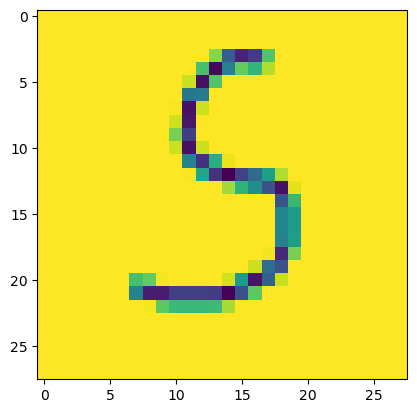

In [299]:
img = cv2.imread("temp.png", 0)
img = cv2.resize(img, (28, 28), interpolation = cv2.INTER_AREA)

plt.imshow(img)
print(label_dict[np.argmax(model.predict(img.reshape(-1, 28, 28, 1)))])

### Testing

In [365]:
import csv
import pandas as pd
import numpy as np
import keras
# import tensorflow as tf
import matplotlib.pyplot as plt

model = keras.models.load_model("OCR CNN Dummy.h5")
df = pd.read_csv("dummy.csv")

def train():
    pass

def predict(image_path):
    global df
    
    # image preprocessing
    img = cv2.imread(image_path, 0)
    img = cv2.resize(img, (28, 28), interpolation = cv2.INTER_AREA)
    img2 = img.reshape(1, 784)
    
    # Wrong predictions for fine tuning
    img2 = pd.DataFrame(img2)
    img2["class"] = "NaN"
    img2.columns = df.columns
    
    df = df.reset_index(drop = True)
    img2 = img2.reset_index(drop = True)
    df = pd.concat([df, img2], axis = 0, ignore_index = True)
    df.to_csv("dummy.csv")
    
    # img = img.reshape(-1, 28, 28, 1)     # use this for prediction
    # print(img.shape)
    
    # print(img2.shape)
    # plt.imshow(img)

predict("Letter.png")
df

KeyError: "['Unnamed: 0'] not found in axis"

In [367]:
df = pd.read_csv("dummy.csv")

In [368]:
df

,Unnamed: 0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784,class
0,0,255,255,255,255,255,255,255,255,255,...,255,255,255,255,255,255,255,255,255,NaN
